# Convergence analysis 

In [1]:
import numpy
import pickle
import convergence_helper 
from matplotlib import pyplot, rcParams
%matplotlib inline

### General information about computations. 

**Parameters used for convergence analysis:** 
```
Precision   double
K           4
Nk          9  
K_fine      37
thresold    0.5
BSZ         128
restart     100
tolerance   1e-5
max_iter    1000
P           15
eps         1e-12
NCRIT       500
theta       0.5   
GPU         1
```

# Ag sphere

We run the single sphere LSPR problem for meshes of 512, 2048, 8192 and 32768 elements, 

Problem parameters:

* Metal    : Silver (Ag). (In water at room temeprature)
* Radius   : 8 nm
* Wavelength: 380 nm

Values of dielectric constants obtained by interpolation:

* Water dielectric: 1.79721+8.50477e-09j
* Silver dielectric: -3.38765+0.19221j


### Loading results data

In [2]:
res_sph_Ag = convergence_helper.pickleload('data/sph_sensor_Ag/sph_sensor_Ag_convergence.pickle')

In [3]:
res_sph_Ag

{'sph_sensor_Ag': {'Cext_0': array([ 2408.14754193,  1990.45817774,  1889.79976177,  1864.09841232]),
  'N': array([   512.,   2048.,   8192.,  32768.]),
  'Time': array([  13.94423103,    8.46635199,   63.42855287,  368.20791411]),
  'analytical': 1854.4764733250092,
  'error': array([ 0.29855923,  0.0733262 ,  0.01904758,  0.00518849]),
  'expected_rate': 4.0,
  'iterations': array([ 12.,  16.,  20.,  25.])}}

In [4]:
num_elements_Ag = res_sph_Ag['sph_sensor_Ag']['N']
C_ext_Ag = res_sph_Ag['sph_sensor_Ag']['Cext_0']
rate_Ag = res_sph_Ag['sph_sensor_Ag']['expected_rate']
rel_err_Ag = res_sph_Ag['sph_sensor_Ag']['error']

### Computing order of convergence

In [5]:
ord_conv_Ag = convergence_helper.ord_convergence(C_ext_Ag, 4)
print('The order of convergence obtained using meshes of 2k, 8k, and 32k elements is {:.2f}'.format(ord_conv_Ag))

The order of convergence obtained using meshes of 2k, 8k, and 32k elements is 0.98


### Generating plot

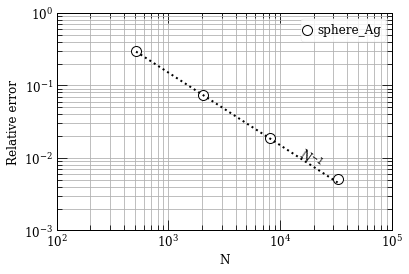

In [6]:
convergence_helper.plot_sph_complex_convergence(num_elements_Ag, rel_err_Ag, Ag=True)

### Generating plot as in paper

In [7]:
#Running this line you reproduce the exact pdf figure as it appears in the paper
convergence_helper.plot_sph_complex_convergence(
    num_elements_Ag, rel_err_Ag, file_name='convergence_sph_Ag_R8_w=380', Ag=True, paper=True)

# BSA sensor system

Convergence analysis of a silver spherical sensor of radius 8 nm with a Bovine Serum Albumina (BSA) protein located at 1 nm of distance in the `z` direction. 

We selected a constant density of 2 triangles per Angstrom square for the protein mesh, while varying the density of the spherical sensor (512, 2048, 8192, 32768 elements). We computed the order of convergence and Richardson extarpolation using the 3 finest meshes, and calculated the respective relative errors. Finally, we analyze the relative errors for differente tolerances and protein meshes to relax the parameters to perform the simulations. 

Problem parameters:

* Metal    : Silver (Ag). (In water at room temeprature)
* Radius   : 8 nm
* Wavelength: 380 nm

Values of dielectric constants obtained by interpolation:

* Water dielectric: 1.79721+8.50477e-09j
* Silver dielectric: -3.38765+0.19221j
* Protein dielectric: 2.75143+0.28602j


### Loading results data

In [8]:
res_bsa_sph = convergence_helper.pickleload('data/sphere_bsa/sphere_bsa_convergence.pickle')

In [9]:
res_bsa_sph

{'sphere_bsa': {'Cext_0': array([ 2301.56988701,  1905.62523724,  1811.09373056,  1786.98185102]),
  'N': array([  98628.,  100164.,  106308.,  130884.]),
  'Time': array([ 8232.30674219,  8231.11177182,  7656.23715186,  9579.5464294 ]),
  'error': array([ 0.293943  ,  0.07134284,  0.01819721,  0.00464151]),
  'expected_rate': 0,
  'iterations': array([ 136.,  134.,  119.,  123.]),
  'rich_extra': 1778.725875259727}}

In [10]:
num_elements_bsa = res_sph_Ag['sph_sensor_Ag']['N'] # We use the refinement of the sphere, sicne we measure on it.
C_ext_bsa = res_bsa_sph['sphere_bsa']['Cext_0']
rate_bsa = 4 # rate of refinement of the sphere since we measure on the sphere. We don't refine the protein mesh  
rel_err_bsa = res_bsa_sph['sphere_bsa']['error']

### Computing order of convergence

In [11]:
ord_conv_bsa = convergence_helper.ord_convergence(C_ext_bsa, 4)
print('The order of convergence obtained using meshes of 2k, 8k, and 32k elements is {:.2f}'.format(ord_conv_bsa))

The order of convergence obtained using meshes of 2k, 8k, and 32k elements is 0.99


### Generating plot

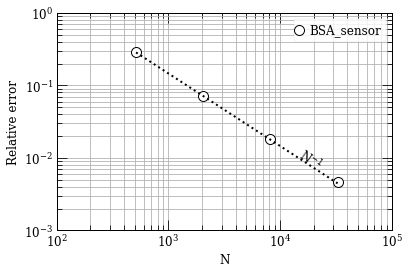

In [12]:
convergence_helper.plot_sph_complex_convergence(num_elements_bsa, rel_err_bsa)

### Generating plot as in paper

In [13]:
#Running this line you reproduce the exact pdf figure as it appears in the paper
convergence_helper.plot_sph_complex_convergence(
    num_elements_bsa, rel_err_bsa, file_name='convergence_bsa_sensor_R8_d=1_w=380', paper=True)

## Relaxation of parameters study 

After performing the respective convergence analysis studies, we relaxed the numerical parameters of the computations to reduce the run-time without compromissing accuracy. The following parameters were used to obtain non-convergence results. In all the cases the relative errors where smaller than 1%

### Single sphere case:

N_sensor = 32768 elements

Relaxed parameters:

```
k_fine = 19
P = 6
tol = 1e-3
```

**The analytical result for this case is:**

In [14]:
Cext_an = res_sph_Ag['sph_sensor_Ag']['analytical'].round(5)

**The computed value with relaxed parameters is:**

In [15]:
Cext_relaxed_sph = 1843.14855

In [16]:
rel_err_sph_Ag = abs(Cext_relaxed_sph - Cext_an)/ Cext_an

print('percentage error', rel_err_sph_Ag * 100)

percentage error 0.610841937509


### Sensor - BSA system (protein located at +1nm on z axis)

* Reduce density of protein form 2 to 1 triangles per Angstrom square and using a 32768 elements for the sensor. 

```
k_fine = 19
P = 6
tol = 1e-3
```

**The richardson extrapolated value for this case is:**

In [17]:
rich_extra = res_bsa_sph['sphere_bsa']['rich_extra'].round(5)

**The computed value with relaxed parameters is:**

In [18]:
Cext_relaxed_sph_bsa = 1767.00731

In [19]:
rel_err_sph_bsa = abs(Cext_relaxed_sph_bsa - rich_extra)/ rich_extra

In [20]:
print('percentage error', rel_err_sph_bsa * 100)

percentage error 0.658818209808
